In [2]:
# Import PyTorch
import torch
from torch import nn
import matplotlib.pyplot as plt

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

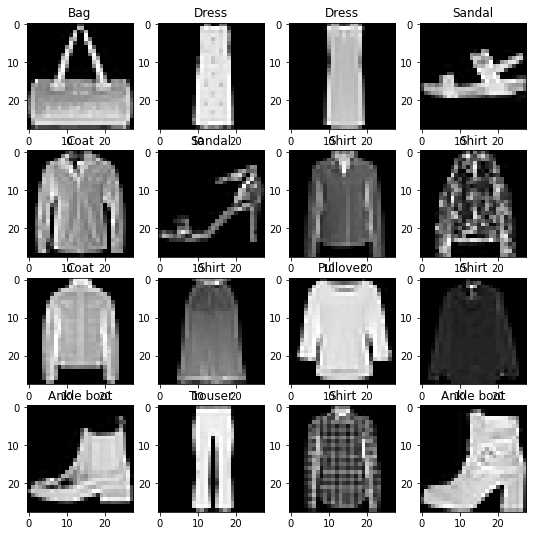

In [7]:
fig = plt.figure(figsize = (9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  randIndex = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[randIndex]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis = False

In [8]:
#Data loader
from torch.utils.data import DataLoader
batch_size = 32

train_loader = DataLoader(train_data,batch_size,True)
test_loader = DataLoader(test_data, batch_size, False)


In [20]:
class FashionMNISTModelConv(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        #kernel: cursor size when scanning tyhe image/ small size leads to more precision and better performance / big size means faster but less precision
        #padding: additional frame to the image/ usually 0
        #stride: / small size leads to more precision and better performance / big size means faster but less precision
        nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride=2)
    )
    self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7,output_shape)
    )
  def forward(self, x):
    return self.classifier(self.block2(self.block1(x)))

model = FashionMNISTModelConv(1, 32, len(class_names)).to(device)
#!pip install torchinfo
from torchinfo import summary
summary(model=model,
        input_size=(1, 1, 28, 28), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
FashionMNISTModelConv (FashionMNISTModelConv)      [1, 1, 28, 28]       [1, 10]              --                   True
├─Sequential (block1)                              [1, 1, 28, 28]       [1, 32, 14, 14]      --                   True
│    └─Conv2d (0)                                  [1, 1, 28, 28]       [1, 32, 28, 28]      320                  True
│    └─ReLU (1)                                    [1, 32, 28, 28]      [1, 32, 28, 28]      --                   --
│    └─Conv2d (2)                                  [1, 32, 28, 28]      [1, 32, 28, 28]      9,248                True
│    └─ReLU (3)                                    [1, 32, 28, 28]      [1, 32, 28, 28]      --                   --
│    └─MaxPool2d (4)                               [1, 32, 28, 28]      [1, 32, 14, 14]      --                   --
├─Sequential (block2)                            

In [19]:
for batch, (X, y) in enumerate(train_loader):
  print(X.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

In [ ]:
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]


In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.1)

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
def make_predictions(model:nn.Module, data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model.forward(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_loader, 
      model=model, 
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(data_loader=test_loader,
      model=model,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )
train_time_end_on_cpu = timer()
#gets the device of the model
total_time = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, str(next(model.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.51339 | Train accuracy: 81.47%
Test loss: 0.38302 | Test accuracy: 85.73%

Epoch: 1
---------
Train loss: 0.31305 | Train accuracy: 88.81%
Test loss: 0.31329 | Test accuracy: 88.42%

Epoch: 2
---------
Train loss: 0.27402 | Train accuracy: 90.20%
Test loss: 0.28086 | Test accuracy: 90.05%

Train time on cuda:0: 40.824 seconds


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


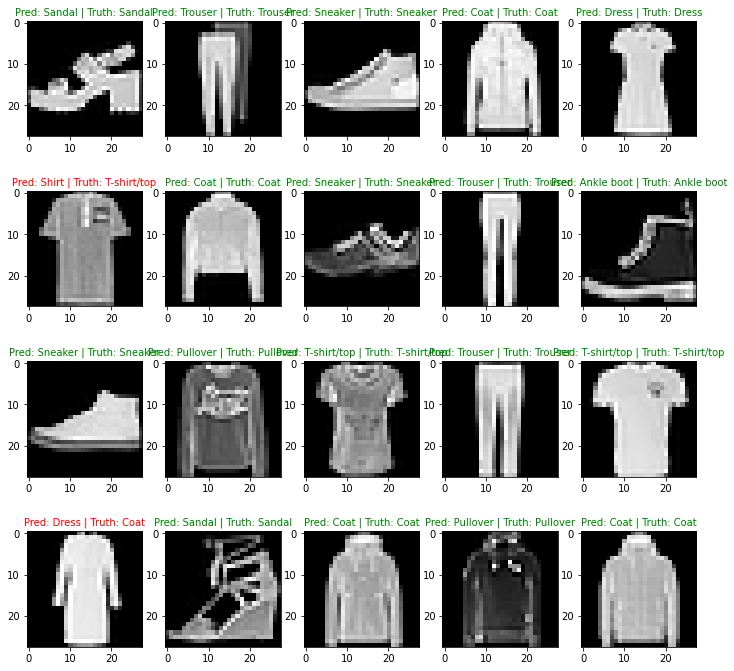

In [ ]:
from numpy.ma.core import sqrt
import random
random.seed(42)
test_samples = []
test_labels = []
num = 20
for sample, label in random.sample(list(test_data), k=num):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

pred_probs = make_predictions(model, test_samples)
pred_classes = pred_probs.argmax(dim=1)

# Plot predictions
plt.figure(figsize=(12, 12))
nrows = round(sqrt(num))
ncols = round(num/nrows)
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis=False;

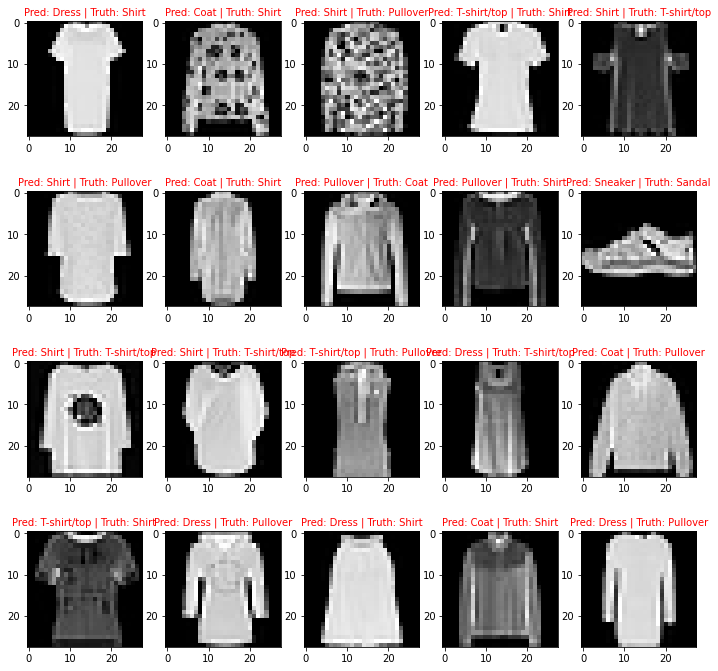

In [ ]:
#Show mistakes
plt.figure(figsize=(12, 12))
nrows = round(sqrt(num))
ncols = round(num/nrows)

all_samples = []
all_labels = []
for sample, label in random.sample(list(test_data), k=1000):
    all_samples.append(sample)
    all_labels.append(label)

all_pred_probs = make_predictions(model, all_samples)
all_pred_classes = all_pred_probs.argmax(dim=1)

showed = 0
for i, sample in enumerate(all_samples):
  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[all_pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[all_labels[i]]
  
  # Check for equality and change title colour accordingly
  if pred_label != truth_label:
      if showed == 20:
        break
      plt.subplot(nrows, ncols, showed+1)
      plt.imshow(sample.squeeze(), cmap="gray")
      title_text = f"Pred: {pred_label} | Truth: {truth_label}"
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
      showed+=1
  plt.axis=False;